In [10]:
import pandas as pd
df  = pd.read_csv('dailykos.csv')
df

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Let’s start by building a hierarchical clustering model. First, read the data set. Then, compute the Euclidian distances. You should cluster on all of the features.

Plot the dendrogram.

Creating the distances will probably take you a while. Why? Explain.


- Computing the distance between all data points can be computationally expensive and time consuming. Euclidean distance computation involves subtracting each feature value of one point from the corresponding feature value of the other point, squaring the differences, summing the squared differences across all features, and taking the square root of the sum. The time required to compute the distances depends on the number of data points and number of features. As the number of data points increases, the number of distance calculations required increases exponentially, making the computation time grow rapidly. Additionally, if the dataset has many features, the Euclidean distance calculation for each pair of data points can become more computationally expensive.

c:\Users\kaush\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\kaush\AppData\Local\Temp\ipykernel_14696\4275688181.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')


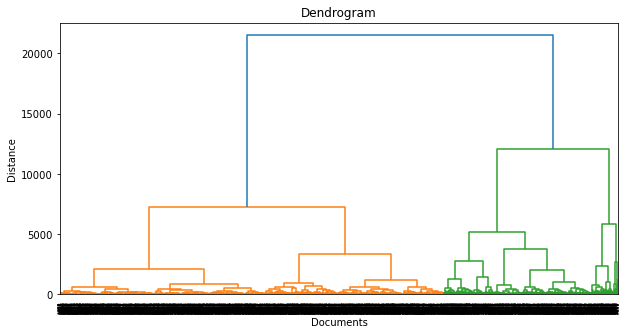

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute Euclidean distances
distances = euclidean_distances(df)

# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward', affinity='euclidean')
model.fit(distances)

# Plot dendrogram
linkage_matrix = linkage(distances, method='ward')
plt.figure(figsize=(10,5))
plt.title('Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
dendrogram(linkage_matrix)
plt.show()


2. (10 points) In this problem, we are trying to cluster news articles or blog posts into groups. This can be used to show readers categories to choose from when trying to decide what to read. Just thinking about this application, what are good choices for the number of clusters? Explain your thinking.

There are several methods to find the ideal number of clusters, such as elbow method, silhouette statistic, Gap statistics etc. We have explained elbow method and silhouette coefficient method below.

1. The elbow method: This method involves plotting the within-cluster sum of squares (WSS) for different values of the k (number of clusters). The elbow point is the value of k where the WSS starts to level off. This is often used as a heuristic for the ideal number of clusters.

2. The silhouette coefficient: This method measures the average similarity of a data point to the other data points in its cluster, compared to the average similarity of the data point to the data points in other clusters. The silhouette coefficient is typically plotted for different values of k. The value of k that corresponds to the highest average silhouette coefficient is often used as the ideal number of clusters.
Thus, a good range for the number of clusters is 5 to 10, which offers a good balance of granularity and interpretability. It is important to note that there is no single "correct" method for determining the ideal number of clusters. The best method to use will depend on the specific dataset and the desired results.

- Thus, a good range for the number of clusters is 5 to 10, which offers a good balance of granularity and interpretability. It is important to note that there is no single "correct" method for determining the ideal number of clusters. The best method to use will depend on the specific dataset and the desired results.


3. Let’s pick 7 clusters and answer the following questions:

How many observations are in cluster 3?
Which cluster has the most observations?
Which cluster has the fewest observations?

In [11]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Cluster the data into 7 clusters using hierarchical clustering
model = AgglomerativeClustering(n_clusters=7, linkage='ward',affinity='euclidean')
clusters = model.fit_predict(df)
#df['clusters'] = clusters

# How many observations are in cluster 3?
print(f"Number of observations in cluster 3: {sum(clusters == 2)}")

Number of observations in cluster 3: 1761


In [12]:
from collections import Counter

# Count the number of times each cluster label appears in the `clusters` array
cluster_counts = Counter(clusters)

# Print the number of observations in each cluster
for cluster, count in cluster_counts.items():
    print(f"Number of Observations in Cluster {cluster+1}: {count}")

Number of Observations in Cluster 3: 1761
Number of Observations in Cluster 2: 167
Number of Observations in Cluster 4: 324
Number of Observations in Cluster 1: 803
Number of Observations in Cluster 7: 50
Number of Observations in Cluster 5: 270
Number of Observations in Cluster 6: 55


In [13]:
# Find the maximum and minimum number of observations
max_observations = max(cluster_counts.values())
min_observations = min(cluster_counts.values())

# Print the maximum and minimum number of observations
print(f"Maximum number of observations: {max_observations} in Cluster 3")
print(f"Minimum number of observations: {min_observations} in cluster 7")

Maximum number of observations: 1761 in Cluster 3
Minimum number of observations: 50 in cluster 7


4. Instead of looking at the average value in each variable individually, we’ll just look at the top 6 words in each cluster.

Compute the mean frequency values of each of the words in cluster 1, and then output the 6 words that occur the most frequently.

What is the most frequent word in this cluster, in terms of average value?

In [14]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Find the top 6 words with the highest mean frequency in cluster 1
cluster1 = df[clusters == 0]  # filter out cluster 1 data
mean_freq = cluster1.mean()  # compute the mean frequency of each word in cluster 1
top6_words = mean_freq.nlargest(6)  # find the top 6 words with the highest mean frequency
print(f"Top 6 words in cluster 1:\n{top6_words}")


Top 6 words in cluster 1:
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64


### Computing the frequenct of top 100 words

In [21]:
top100_words = mean_freq.nlargest(100)  # find the top 6 words with the highest mean frequency
top100_words

poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
                ...   
ballot        0.174346
place         0.174346
florida       0.170610
register      0.170610
start         0.170610
Length: 100, dtype: float64

In [22]:
#What is the most frequent word in this cluster, in terms of average value?

print('Most frequent word in cluster 1 is poll')

Most frequent word in cluster 1 is poll


5. (10 points) Now repeat the command given in the previous problem for each of the other clusters, and answer the following questions.

Which cluster could best be described as the cluster related to the Iraq war?
In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party?



In [23]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Find the top 6 words with the highest mean frequency for each cluster
for i in range(7):
    cluster = df[clusters == i]
    mean_freq = cluster.mean()
    top6_words = mean_freq.nlargest(6)
    print(f"\nTop 6 words in cluster {i+1}:\n{top6_words}")



Top 6 words in cluster 1:
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64

Top 6 words in cluster 2:
kerry       8.101796
bush        7.574850
campaign    1.862275
poll        1.736527
presided    1.616766
democrat    1.389222
dtype: float64

Top 6 words in cluster 3:
bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64

Top 6 words in cluster 4:
november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
bush          2.858025
democrat      2.858025
dtype: float64

Top 6 words in cluster 5:
bush              4.777778
iraq              3.425926
war               2.470370
administration    2.225926
american          1.633333
presided          1.488889
dtype: float64

Top 6 words in cluster 6:
dean         12.309091
kerry         5.345455
democrat      3

In [24]:
# Which cluster corresponds to the Iraq War?

print("Cluster 5 corresponds to the Iraq War.")

Cluster 5 corresponds to the Iraq War.


In [25]:
# Which cluster corresponds to the Democratic party?

print("Cluster 6 corresponds to the Democratic party.")

Cluster 6 corresponds to the Democratic party.


6. (10 points) Now, run k-means clustering, setting the random state to 1000. Again, pick the number of clusters equal to 7.

Subset your data into the 7 clusters (7 new datasets) by using the "cluster" variable of your kmeans output.

How many observations are in Cluster 3?
Which cluster has the most observations?
Which cluster has the fewest number of observations?

In [26]:
from sklearn.cluster import KMeans
df  = pd.read_csv('dailykos.csv')

# Computing k-means clustering of 7 clusters and a random_state set to 1000


kmeans = KMeans(n_clusters=7, random_state=1000).fit(df)

# Assigning the cluster labels to the kmean cluster frame
kmean_cluster = kmeans.labels_

# Converting the Numpy ndarray to a Pandas Series
kmean_cluster = pd.Series(kmean_cluster)

# Counting the number of observations in each cluster
cluster_counts1 = kmean_cluster.value_counts()


print(f"Number of observations in Cluster 3: {cluster_counts1.loc[2]}")
print(f"Cluster with the most observations: Cluster {cluster_counts1.idxmax()+1}")
print(f"Cluster with the fewest observations: Cluster {cluster_counts1.idxmin()+1}")


Number of observations in Cluster 3: 330
Cluster with the most observations: Cluster 2
Cluster with the fewest observations: Cluster 6


In [27]:
# Print the number of observations in each cluster
for cluster, count in cluster_counts1.items():
    print(f"Number of Observations in Cluster {cluster+1}: {count}")

Number of Observations in Cluster 2: 1937
Number of Observations in Cluster 4: 368
Number of Observations in Cluster 1: 339
Number of Observations in Cluster 3: 330
Number of Observations in Cluster 7: 264
Number of Observations in Cluster 5: 153
Number of Observations in Cluster 6: 39


7. (10 points) Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.

Which k-means cluster best corresponds to the Iraq War?
Which k-means cluster best corresponds to the democratic party? (Remember that we are looking for the names of the key democratic party leaders.)

In [28]:
# Compute the top 6 words in each kmean clusters

clusters1 = pd.DataFrame(df.groupby(kmean_cluster).mean())

for i in range(0,7):
    print("\nTop 6 words in K-means cluster ", i+1, ":")
    print(clusters1.iloc[i,:].nlargest(6))


Top 6 words in K-means cluster  1 :
democrat      3.064897
republican    2.920354
state         2.094395
elect         1.970501
parties       1.793510
vote          1.643068
Name: 0, dtype: float64

Top 6 words in K-means cluster  2 :
bush        1.183789
kerry       0.799690
poll        0.724832
democrat    0.631905
general     0.505421
elect       0.488384
Name: 1, dtype: float64

Top 6 words in K-means cluster  3 :
november     10.369697
poll          4.863636
vote          4.439394
challenge     4.127273
bush          3.081818
democrat      2.866667
Name: 2, dtype: float64

Top 6 words in K-means cluster  4 :
bush        8.635870
kerry       4.934783
poll        2.160326
presided    1.853261
campaign    1.331522
democrat    1.312500
Name: 3, dtype: float64

Top 6 words in K-means cluster  5 :
dean        7.725490
kerry       5.261438
clark       2.993464
edward      2.862745
democrat    2.633987
poll        2.326797
Name: 4, dtype: float64

Top 6 words in K-means cluster  6 :
demo

In [29]:
# Which k-means cluster corresponds to the Iraq War?
print("Cluster 7 corresponds to the Iraq War.")

Cluster 7 corresponds to the Iraq War.


In [30]:
# Which cluster corresponds to the Democratic party?

print("Cluster 5 corresponds to the Democratic party.")

Cluster 5 corresponds to the Democratic party.


8. (10 points) For the rest of this problem, I’ll ask you to compare how observations were assigned to clusters in the two different methods. You could use the Pandas crosstab function to compare the cluster assignment of hierarchical clustering to the cluster assignment of k-means clustering. :

Which Hierarchical Cluster best corresponds to K-Means Cluster 2?
Which Hierarchical Cluster best corresponds to K-Means Cluster 3?

In [31]:
df['clusters'] = clusters

# Creating a crosstab comparing the both clustering
print("Crosstab comparison:\n")

comparison_crosstab = pd.crosstab(clusters, kmean_cluster, rownames=['Agglomerative'], colnames=['K-means'])
print(comparison_crosstab)

# Finding the best corresponding agglomerative cluster for each K-means cluster
best_corresponding_hierarchical_clusters = comparison_crosstab.idxmax(axis=0)



Crosstab comparison:

K-means          0     1    2    3   4   5    6
Agglomerative                                  
0              240   367    1   97  89   4    5
1                2    38    4  114   6   0    3
2               75  1509    0   94   4   0   79
3                0     0  324    0   0   0    0
4               10    23    0   59   0   1  177
5                0     0    0    0  54   1    0
6               12     0    1    4   0  33    0


In [33]:
# Which Hierarchical Cluster best corresponds to K-Means Cluster 2?
print(f"\n Hierarchical (Agglomerative) Cluster best corresponding to K-Means Cluster 2: Cluster 3")

# Which Hierarchical Cluster best corresponds to K-Means Cluster 3?
print(f"\n Hierarchical (Agglomerative) Cluster best corresponding to K-Means Cluster 3: Cluster 4 ")



 Hierarchical (Agglomerative) Cluster best corresponding to K-Means Cluster 2: Cluster 3

 Hierarchical (Agglomerative) Cluster best corresponding to K-Means Cluster 3: Cluster 4 
